In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**1. Importar e Preparar os Dados**

In [97]:
url = 'https://raw.githubusercontent.com/fernandoawari/calculadora-aluguel-turma-set-20/main/2-manipulacao/dados_aluguel_ml_sao_paulo_preprocessado.csv'

In [98]:
data = pd.read_csv(url)
data.head()

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300


In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1341.0,112.697987,259.503149,1.0,48.0,67.0,106.0,7800.0
quartos,1273.0,2.106834,0.882869,1.0,1.0,2.0,3.0,5.0
aluguel,1344.0,4396.404762,29225.842756,299.0,1500.0,2200.0,3577.5,870000.0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   area             1341 non-null   float64
 3   quartos          1273 non-null   float64
 4   aluguel          1344 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 52.6+ KB


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
train, test = train_test_split(data, test_size=0.25, random_state=123, stratify=data['zona'])

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 221 to 904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1008 non-null   object 
 1   enderecos_lista  1008 non-null   object 
 2   area             1005 non-null   float64
 3   quartos          948 non-null    float64
 4   aluguel          1008 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 47.2+ KB


In [104]:
train['zona'].value_counts()

norte    252
leste    252
oeste    252
sul      252
Name: zona, dtype: int64

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 419 to 1159
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             336 non-null    object 
 1   enderecos_lista  336 non-null    object 
 2   area             336 non-null    float64
 3   quartos          325 non-null    float64
 4   aluguel          336 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 15.8+ KB


In [106]:
test['zona'].value_counts()

oeste    84
norte    84
leste    84
sul      84
Name: zona, dtype: int64

In [107]:
test.head()

,zona,enderecos_lista,area,quartos,aluguel
419,sul,"Rua Abagiba, Saúde, São Paulo Zona Sul, São Paulo",52.0,2.0,2020
366,sul,"Rua Francisco José Da Silva, Vila Andrade, São...",40.0,1.0,1502
618,sul,"Rua Maracá, Vila Guarani (z Sul), São Paulo Zo...",47.0,2.0,1610
653,sul,"Avenida Barão De Campos Gerais, Real Parque, S...",115.0,3.0,3000
248,norte,"Rua Voluntários Da Pátria, Santana, São Paulo ...",40.0,1.0,2500


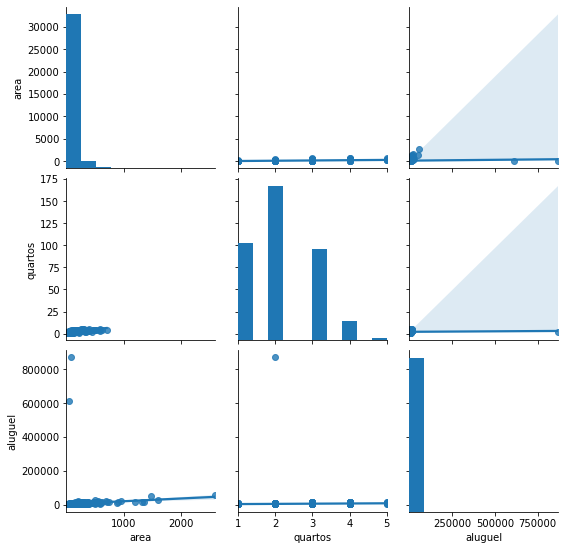

In [108]:
sns.pairplot(train, kind='reg')

In [109]:
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)

In [110]:
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

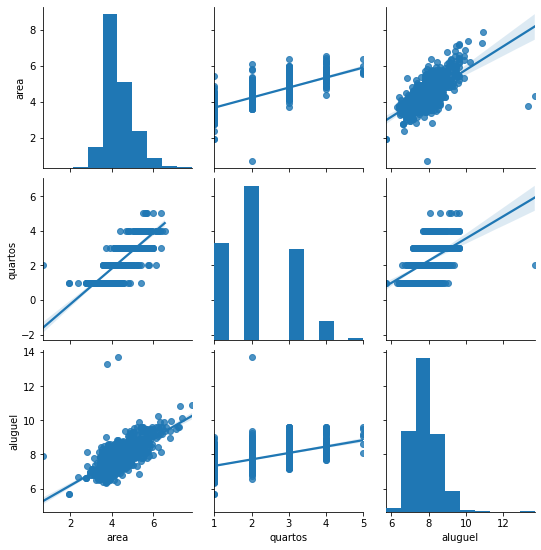

In [111]:
sns.pairplot(train, kind='reg')

In [112]:
X_cols = ['zona', 'area', 'quartos']
y_col = ['aluguel']

In [113]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [114]:
X_train.head()

,zona,area,quartos
221,norte,4.007333,2.0
956,leste,4.406719,3.0
721,leste,4.454347,2.0
604,sul,4.369448,3.0
119,norte,4.875197,NaN


In [115]:
# Tratar colunas categoricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [116]:
X_train.head()

,area,quartos,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,2.0,0,1,0,0
956,4.406719,3.0,1,0,0,0
721,4.454347,2.0,1,0,0,0
604,4.369448,3.0,0,0,0,1
119,4.875197,NaN,0,1,0,0


In [117]:
# Tratar valores ausente
# Importante: Usar informações do conjunto de treino
train_medians = X_train.median()
X_train=X_train.fillna(train_medians)
X_test=X_test.fillna(train_medians)

In [118]:
X_train.head()

,area,quartos,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,2.0,0,1,0,0
956,4.406719,3.0,1,0,0,0
721,4.454347,2.0,1,0,0,0
604,4.369448,3.0,0,0,0,1
119,4.875197,2.0,0,1,0,0


**2. Machine Learning**

In [119]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
y_pred = neigh.predict(X_test)

In [121]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.4736086843481374

In [122]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

0.22430518588997367

In [123]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.36167420588292315

In [124]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5161897704625475

**3. Triagem com Outros Modelos**

In [128]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.608198296027433

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]


for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.8733718770209121
Test score 0.19173397097448375
Treinando RandomForestRegressor
Train score 0.8289831999922137
Test score 0.43848782632573957
Treinando MLPRegressor
Train score 0.5352591616667083
Test score 0.6136454420099193
Treinando XGBRegressor
Train score 0.855990087811
Test score 0.2178261615510081


In [130]:
len(X_train)//3

336

In [131]:
X1=X_train[:336]
X2=X_train[336:2*336]
X3=X_train[2*336:]

In [132]:
# Repetindo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=3)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)


Treinando DecisionTreeRegressor
Train score 0.8733718770209121
Validation score [-0.08129143  0.31735679  0.33568213]
Test score 0.1918734807288741
Treinando RandomForestRegressor
Train score 0.829703321211758
Validation score [0.36204972 0.43047183 0.4330758 ]
Test score 0.4560361210564874
Treinando MLPRegressor
Train score 0.5379917885807335
Validation score [0.47505026 0.54396204 0.5406591 ]
Test score 0.6123781970859763
Treinando XGBRegressor
Train score 0.855990087811
Validation score [0.26031691 0.34178302 0.40928334]
Test score 0.2178261615510081


In [133]:
# TODO: Calibração de modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [134]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [135]:
reg = gs.best_estimator_

In [136]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.5789568895873305
Validation score [0.49927174 0.5198924  0.50999349]
Test score 0.6060030250456334


In [137]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

## and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)

**Testando todos os regressores de sklearn**

In [138]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [139]:
for reg in all_regs:
  try:
    print('Treinando', reg.__class__.__name__)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    val_score = cross_val_score(reg, X_train, y_train, cv=3)
    test_score = reg.score(X_test, y_test)
    print('Train score', train_score)
    print('Validation score', val_score)
    print('Test score', test_score)
    print('='*80)
  except Exception as e:
    print(e)

Treinando ARDRegression
Train score 0.5352118136732753
Validation score [0.49442644 0.55090771 0.53209802]
Test score 0.6090776818779764
Treinando AdaBoostRegressor
Train score 0.556470057919171
Validation score [0.41246289 0.40944142 0.47909385]
Test score 0.3863935358462227
Treinando BaggingRegressor
Train score 0.8174543520961679
Validation score [0.24426642 0.38980959 0.39996308]
Test score 0.42260383581418404
Treinando BayesianRidge
Train score 0.5356922527589508
Validation score [0.49466432 0.55075339 0.5309406 ]
Test score 0.6083168791197097
Treinando CCA
Train score 0.46493303472989855
Validation score [0.40594575 0.45094989 0.49658903]
Test score 0.5230467772572778
Treinando DecisionTreeRegressor
Train score 0.8733718770209121
Validation score [-0.070718    0.29151561  0.33113662]
Test score 0.18805921978625106
Treinando DummyRegressor
Train score 0.0
Validation score [-5.22923725e-05 -1.94718974e-02 -1.21164358e-02]
Test score -0.00010035088108661938
Treinando ElasticNet
Trai

Train score 0.47119391135123234
Validation score [0.45262914 0.53911382 0.53188978]
Test score 0.5430852717889935
Treinando RadiusNeighborsRegressor
Input contains NaN, infinity or a value too large for dtype('float64').
Treinando RandomForestRegressor
Train score 0.8327619455436923
Validation score [0.39140972 0.40521159 0.42563977]
Test score 0.4450225123472509
Treinando Ridge
Train score 0.5357033596479182
Validation score [0.49451697 0.55049026 0.53135717]
Test score 0.6082650812793224
Treinando RidgeCV
Train score 0.5357033596479182
Validation score [0.49451697 0.55049026 0.53135717]
Test score 0.6082650812793189
Treinando SGDRegressor
Train score 0.4935991972365199
Validation score [0.3389435  0.50707741 0.49421551]
Test score 0.5673491430716954
Treinando SVR
Train score 0.5528172816544671
Validation score [0.52325006 0.54525298 0.52804062]
Test score 0.6008914593389263
Treinando TheilSenRegressor
Train score 0.48579661235916904
Validation score [0.42409014 0.5263125  0.48027905]